# Periodic sampling

Sampling is performed by applying a continuous signal to an analog-to-digital (A/D) converter whose output is a series of digital values.

## Aliasing: signal ambiguity in the frequency domain

There is a frequency-domain ambiguity associated with discrete-time signal samples that does not exist in the continuous signal world.
Suppose you were given the following sequence of values,
\begin{align*}
x(0) &= 0 \\
x(1) &= 0.866 \\
x(2) &= 0.866 \\
x(3) &= 0 \\
x(4) &= -0.866 \\
x(5) &= -0.866 \\
x(6) &= 0
\end{align*}
and were told that they represent instantaneous values of a time-domain sinewave taken at periodic intervals.
Next, you'd be likely to draw the sinewave, illustrated by the solid line, that passes thorugh the points representing the original sequence.
Another person, however, might draw the sinewave shown by the shaded line. 
The key issue is that, if the data sequence represented periodic samples of a sinewave, we cannot unambiguously determine the freqeuncy of the sinewave from those sample values alone.

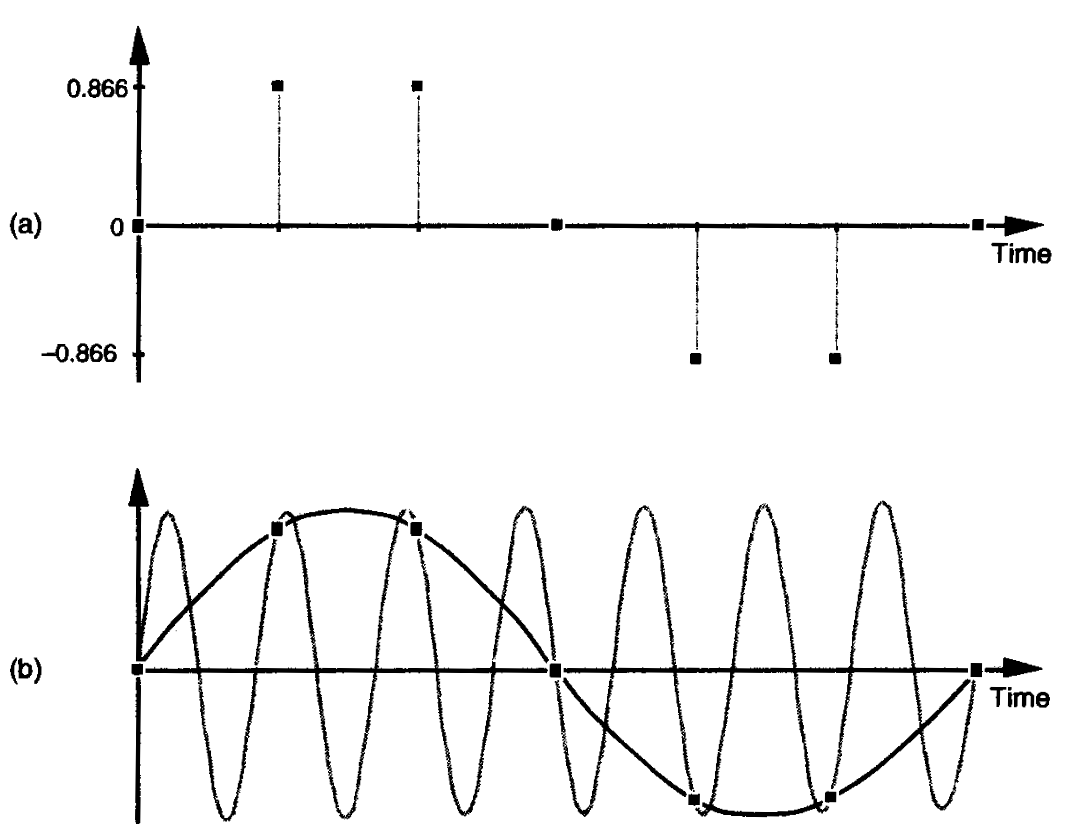

Consider the continuous time-domain sinusoidal signal defined as 
$$
x(t) = \sin(2\pi f_o t)
$$

The $x(t)$ signal is a garden variety sinewave whose frequency is $f_o$ Hz. Now let's sample $x(t)$ at a rate of $f_s$ samples/s, i.e., at regular periods of $t_s$ seconds where $t_s=1/f_s$.
\begin{align*}
\text{0th sample:} &x(0) = \sin(2\pi f_o 0 t_s) \\
\text{1st sample:} &x(0) = \sin(2\pi f_o 1 t_s) \\
\text{2nd sample:} &x(0) = \sin(2\pi f_o 2 t_s) \\
... \\
\text{nth sample:} &x(0) = \sin(2\pi f_o n t_s) \tag{2.2}
\end{align*}

Equantion 2.2 defines the value of the $n$th sample of our $x(n)$ sequence to be equal to the original sinewave at the time instant $n t_s$. Because two values of a sinewave are identical if they're separate by an integer multiple of $2\pi$ radians, i.e, $\sin(\phi)=\sin(\phi + 2\pi m)$ where $m$ is any integer, we can modify eq. 2.2 as
$$
x(n) = \sin(2\pi f_o n t_s) = \sin(2\pi f_o n t_s + 2\pi m) = \sin(2\pi (f_o + \frac{1}{32}) n t_s) \tag{2.3}
$$

If we let $m$ be an integer multiple of $n$, $m = kn$, we can replace the $m/n$ ration in Eq 2.3 with $k$ so that
$$
x(n) = \sin(2 \pi (f_o + \frac{k}{t_s})n t_s) \tag(2.4)
$$
Because $f_s = 1/t_s$, we can equante the x(n) sequences in Eq 2.2 and 2.4 as
$$
x(n) = \sin(2\pi f_o n t_s) = \sin(2\pi (f_o + f f_s)n t_s) \tag(2.5)
$$
The $f_o$ and $(f_o + k f_s)$ factors in Eq. 2.5 are therefore equal.
In other words, Eq. 2,5 states that

** When sampling at rate of $f_s$ samples/s, if $k$ is any positive or negative integer, we cannot distinguish between the sampled values of a sinewave of $f_o$ Hz and sinewave of $(f_o + k f_s)$ Hz. 